# Koert's plantjes database

* Loading the input .txt file `data/plantjes_input.txt`

In [1]:
import pandas as p
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re

* Read the csv file as a Pandas dataframe.

In [2]:
df = p.read_csv("data/plantjes_input.txt", sep="\t", index_col="Nr")
df

,reference,PlantNaam,Licht,Vochtigheid,Plantdichtheid,Habitat,Kleur,Hooghte,bladhooghte,bloei,Unnamed: 11
Nr,,,,,,,,,,,
1,1622880882-8412,Pennisetum thunberghii 'Red Buttons',zon,droog afdekken,aantal : 7 tot 10 per m2,Droge bodem met grind (GR1) Open plaatsen ...,rood,70 cm,40 cm,40 cm,8-10
2,1622882986-12441,Calamagrostis acutiflora (x) 'England',zon,droog fris,aantal : 2 tot 4 per m2 - alleen of in klein...,Open plaatsen met droge bodem (OP1B) Open ...,geel,100 cm,70 cm,70 cm,8-10
3,1622882992-12455,Mentha requienii,zon half schaduw,vochtig,aantal : 8 tot 12 per m2 - in kleine groepje...,Open plaatsen met vochtige bodem (OP3) ...,lila,1 cm,1 cm,1 cm,7- 9
4,1622883235-13062,Digitalis laevigata 'Alba',zon half schaduw,fris,aantal : 6 tot 9 per m2 - in kleine groepjes...,Bosrand met frisse bodem (BR2) Open plaats...,wit,80 cm,40 cm,40 cm,6- 8
5,1622883514-13780,Echinacea purpurea DELICIOUS CANDY®,zon,droog fris,aantal : 8 tot 12 per m2 - in kleine groepje...,Gemengde boord met droge bodem (GB1) Gemen...,roze,70 cm,30 cm,30 cm,7- 9
...,...,...,...,...,...,...,...,...,...,...,...
5816,1622884354-15690,Aster cordifolius 'Blütenregen',zon,fris,aantal : 5 tot 7 per m2 - in kleine groepjes...,Gemengde boord met frisse bodem (GB2) Open...,lila,90 cm,60 cm,60 cm,9-10
5817,1622880826-8250,Geranium magnificum (x) 'Rosemoor',zon half schaduw,fris,aantal : 6 tot 9 per m2 - in kleine groepjes...,Bosrand met frisse bodem (BR2) Open plaats...,violet,35 cm,20 cm,20 cm,6- 8
5818,1622884390-15811,Geranium nodosum 'Swiss Purple',half schaduw schaduw,fris,aantal : 8 tot 12 per m2,Bos en onder bomen met frisse bodem (B2) B...,paars,40 cm,15 cm,15 cm,6- 9


#### Some functions to clean up the Dataframe:
* extracting plant name and cultivar name
* parsing multi-valued columns
* coercing numerical types as ints, unit in the column name

In [19]:
def cultivar(name):
    match = re.findall('\'.*?\'', name)

    if match:
        return match[0].strip("'")

def plant_name(name):
    return name.split("'")[0].strip()

def clean_row(row):    
    if row["Vochtigheid"]:
        row["Vochtigheid"] = [x.strip().capitalize() for x in str(row["Vochtigheid"]).split(" ") if x.strip()]
        
    if row["Licht"]:
        row["Licht"] = [x.strip().capitalize() for x in str(row["Licht"]).split(" ") if x.strip()]
        
    # print(row["Kleur"])
    if row["Kleur"]:
        color = str(row["Kleur"]).strip().capitalize()
        row["Kleur"] = color if color != "Nan" else None
        
    name_raw = row["PlantNaam"]
    row["Naam"] = plant_name(name_raw)
    row["Cultivar"] = cultivar(name_raw)
    
    if row["Habitat"]:        
        [habitat, extra] = str(row["Habitat"]).split("extra informatie")            
        row["Extra informatie"] = [_.strip().capitalize() for _ in extra.split("  ") if _.strip()]        
        row["Habitat"] = [x.strip().capitalize() + ")" for x in habitat.split(")") if x.strip()]

    if row["Plantdichtheid"]:
        row["Dichtheid"] = [x.strip().capitalize() for x in str(row["Plantdichtheid"]).split("-") if x.strip()]
    
    [bloei_start_maand, bloei_einde_maand] = row["Unnamed: 11"].split("-")
    bloei_start_maand = int(bloei_start_maand.strip())
    bloei_einde_maand = int(bloei_einde_maand.strip())
    row["Bloei start (maand)"] = bloei_start_maand
    row["Bloei einde (maand)"] = bloei_einde_maand
    row["Bloei #maanden"] = bloei_einde_maand + 1 - bloei_start_maand
    row["Bloei hoogte (cm)"] = int(row["bloei"].split("cm")[0].strip())
    
    row["Hoogte (cm)"] = int(row["Hooghte"].split("cm")[0].strip())
    row["Bladhoogte (cm)"] = int(row["bladhooghte"].split("cm")[0].strip())
        
    return row

* Cleanup by iterating over the rows applying the cleanup function on each row

In [ ]:
df = p.read_csv("data/plantjes_input.txt", sep="\t", index_col="Nr")

#df_clean["Kleur"] = df_clean["Kleur"].astype(str)
df_clean = df.apply(clean_row, axis=1)
df_clean

* Plot some features frequencies

In [ ]:
df_clean.Kleur.unique()

<AxesSubplot:>

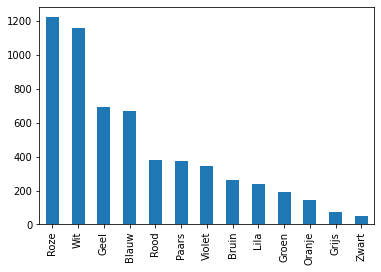

In [6]:
fig, ax = plt.subplots()
df_clean["Kleur"].value_counts().plot(ax=ax, kind="bar")

<AxesSubplot:>

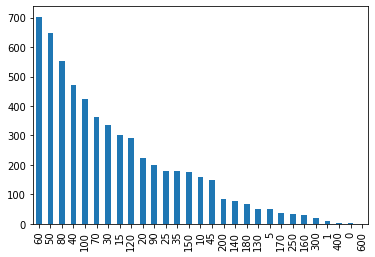

In [7]:
fig, ax = plt.subplots()
df_clean["Hoogte (cm)"].value_counts().plot(ax=ax, kind="bar")

* As you Kleur see, we added cleaned up columns as new columns to the dataframe

In [8]:
df_clean.columns

Index(['reference', 'PlantNaam', 'Licht', 'Vochtigheid', 'Plantdichtheid',
       'Habitat', 'Kleur', 'Hooghte', 'bladhooghte', 'bloei', 'Unnamed: 11',
       'Naam', 'Cultivar', 'Extra informatie', 'Dichtheid',
       'Bloei start (maand)', 'Bloei einde (maand)', 'Bloei hoogte (cm)',
       'Hoogte (cm)', 'Bladhoogte (cm)'],
      dtype='object')

* Pick the relevant columns, and sort by name and cultivar

In [9]:
df_select = df_clean[["Naam", "Cultivar", "Kleur", 
                      "Habitat", "Extra informatie", "Licht", "Vochtigheid", "Dichtheid",
                      "Bloei start (maand)", "Bloei einde (maand)", "Bloei" "Bloei hoogte (cm)", "Hoogte (cm)", "Bladhoogte (cm)", 
                      "reference"]].sort_values(by=['Naam', "Cultivar"])
df_select

,Naam,Cultivar,Kleur,Habitat,Extra informatie,Licht,Vochtigheid,Dichtheid,Bloei start (maand),Bloei einde (maand),Bloei hoogte (cm),Hoogte (cm),Bladhoogte (cm),reference
Nr,,,,,,,,,,,,,,
1185,Acaena buchananii,None,Bruin,"[Droge bodem met grind (gr1), Frisse bodem met...","[Bladhoudend, Bodembedekker]",[Zon],"[Droog, Fris]","[Aantal : 8 tot 12 per m2, Werkelijk zeer gro...",6,8,5,5,5,1622884148-15137
4990,Acaena buchananii,None,Bruin,"[Droge bodem met grind (gr1), Frisse bodem met...","[Bladhoudend, Bodembedekker]",[Zon],"[Droog, Fris]","[Aantal : 8 tot 12 per m2, Werkelijk zeer gro...",6,8,5,5,5,1622881800-10282
14,Acaena magellanica,None,Bruin,"[Droge bodem met grind (gr1), Frisse bodem met...","[Bladhoudend, Bodembedekker]",[Zon],"[Droog, Fris]","[Aantal : 8 tot 12 per m2, Werkelijk zeer gro...",6,8,10,10,10,1622884950-16994
2437,Acaena magellanica,None,Bruin,"[Droge bodem met grind (gr1), Frisse bodem met...","[Bladhoudend, Bodembedekker]",[Zon],"[Droog, Fris]","[Aantal : 8 tot 12 per m2, Werkelijk zeer gro...",6,8,10,10,10,1622880777-8158
807,Acaena microphylla,Dichte Matte,Bruin,"[Droge bodem met grind (gr1), Frisse bodem met...","[Bladhoudend, Bodembedekker]",[Zon],"[Droog, Fris]","[Aantal : 8 tot 12 per m2, Werkelijk zeer gro...",6,8,10,10,10,1622884420-15866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,Woodwardia fimbriata,None,Groen,"[Bos en onder bomen met frisse bodem (b2), Bos...",[],"[Half, Schaduw, Schaduw]","[Fris, Afdekken]","[Aantal : 3 tot 5 per m2, Alleen of in kleine...",0,0,125,120,125,1622879586-5583
3539,Zizia aurea,None,Geel,"[Bosrand met frisse bodem (br2), Open plaatsen...","[Aromatisch, Vlinderplant nectar]","[Zon, Half, Schaduw]","[Fris, Vochtig]","[Aantal : 3 tot 5 per m2, In kleine groepjes ...",5,6,40,90,40,1622883631-13988
4342,Zizia aurea,None,Geel,"[Bosrand met frisse bodem (br2), Open plaatsen...","[Aromatisch, Vlinderplant nectar]","[Zon, Half, Schaduw]","[Fris, Vochtig]","[Aantal : 3 tot 5 per m2, In kleine groepjes ...",5,6,40,90,40,1622883929-14667


* Write the dataframe to disk as json file (records)

In [10]:
df_select.to_json("data/plantjes.json", orient='records')

* Some snippets for QC

In [11]:
df_extra = p.DataFrame(np.concatenate(df_select["Extra informatie"].ravel()), columns=["A"])

In [12]:
df_extra["A"].unique()

array(['Bladhoudend', 'Bodembedekker', 'Snijbloem', 'Aromatisch',
       'Vlinderplant nectar', 'Licht uitzaaiend', 'New',
       'Sterk uitzaaiend', 'Uitzaaiend', 'Bijenplant', 'Licht woekerend',
       'Macho', 'Js', 'Woekerend', 'Waardplant vlinders',
       'Hard woekerend', 'Hard woekerend sterk uitzaaiend',
       'Licht woekerend sterk uitzaaiend'], dtype=object)